Chargement des bibliothèques et des données

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
# Chemins vers les dossiers de données
data_dir = 'data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

Fonction pour charger et prétraiter les images

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpeg') or file.endswith('.png'):
                filepath = os.path.join(subdir, file)
                # Lire l'image
                img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    # Redimensionner l'image pour une taille cohérente
                    img = cv2.resize(img, (128, 128))
                    # Aplatir l'image en un vecteur de caractéristiques 
                    img_flat = img.flatten()
                    images.append(img_flat)
                    # Déduire le label à partir du chemin du fichier
                    if 'NORMAL' in subdir:
                        labels.append(0)
                    elif 'PNEUMONIA' in subdir:
                        labels.append(1)
    return np.array(images), np.array(labels)

# Chargement des données
X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)
X_test, y_test = load_images_from_folder(test_dir)


Standardisation et réduction de la dimensionnalité

In [3]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=50)  # Choisir le nombre de composantes principales
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)


Application de l'algorithme de clustering

In [4]:
# Application de KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # Deux clusters : NORMAL et PNEUMONIA
kmeans.fit(X_train_pca)

# Prédiction des clusters
train_clusters = kmeans.predict(X_train_pca)
val_clusters = kmeans.predict(X_val_pca)
test_clusters = kmeans.predict(X_test_pca)


Évaluation des résultats

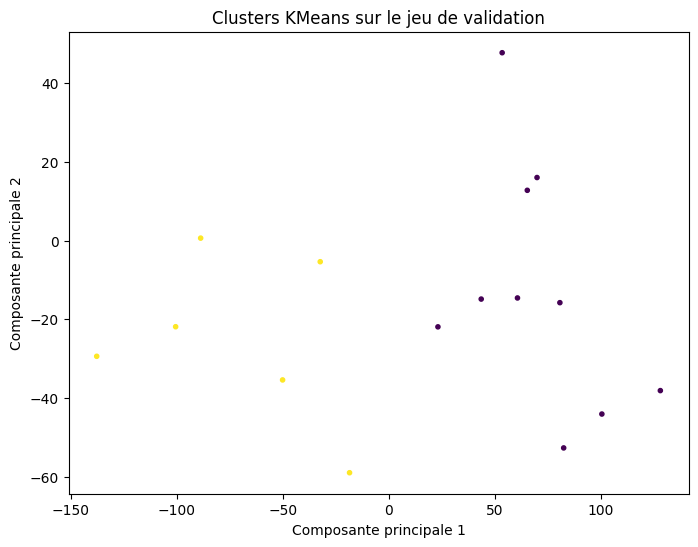

Accuracy: 0.5448717948717948


In [5]:
# Visualisation des clusters
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.show()

# Visualisation des clusters sur les données de validation
plot_clusters(X_val_pca, val_clusters, 'Clusters KMeans sur le jeu de validation')

# Comparaison avec les labels réels
from sklearn.metrics import accuracy_score

# Conversion des clusters en classes prédictives (peut nécessiter un ajustement)
predicted_labels = np.where(test_clusters == 1, 1, 0)

# Évaluation
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy: {accuracy}')


Version 1 : Visualisation avec couleurs distinctes pour chaque cluster

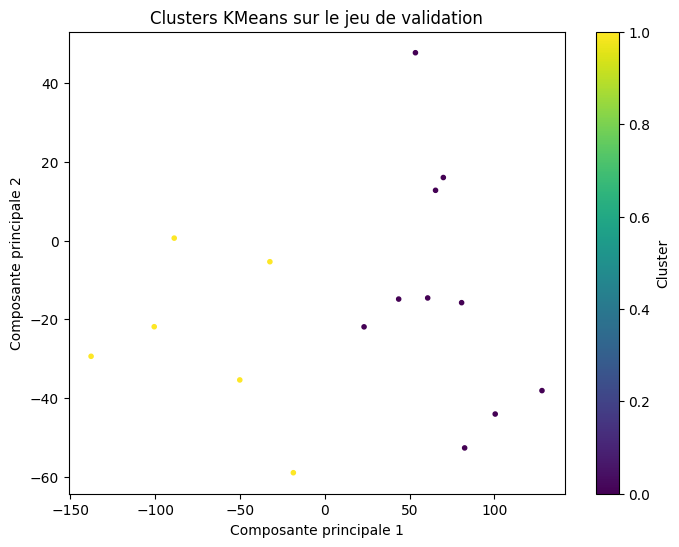

In [6]:
def plot_clusters_v1(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Visualisation des clusters sur les données de validation
plot_clusters_v1(X_val_pca, val_clusters, 'Clusters KMeans sur le jeu de validation')


Version 2 : Visualisation avec centroids des clusters

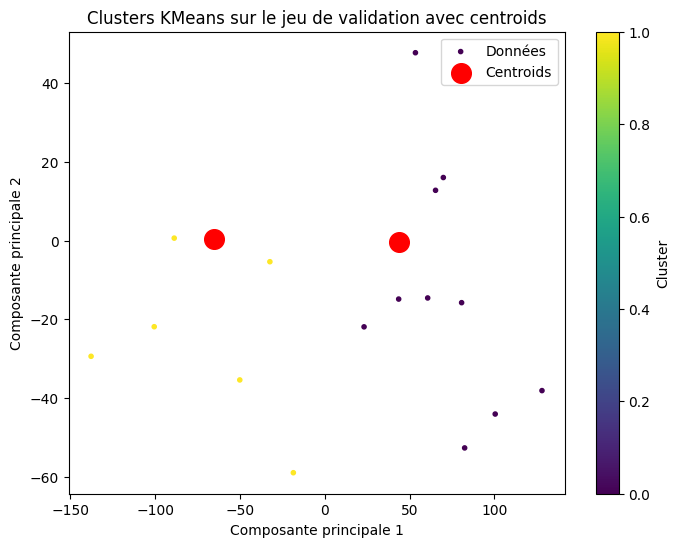

In [7]:
def plot_clusters_v2(X, clusters, centroids, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='.', label='Données')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

# Récupération des centroids
centroids = kmeans.cluster_centers_

# Visualisation des clusters sur les données de validation avec centroids
plot_clusters_v2(X_val_pca, val_clusters, centroids, 'Clusters KMeans sur le jeu de validation avec centroids')


Version 3 : Visualisation avec PCA à 3 composantes

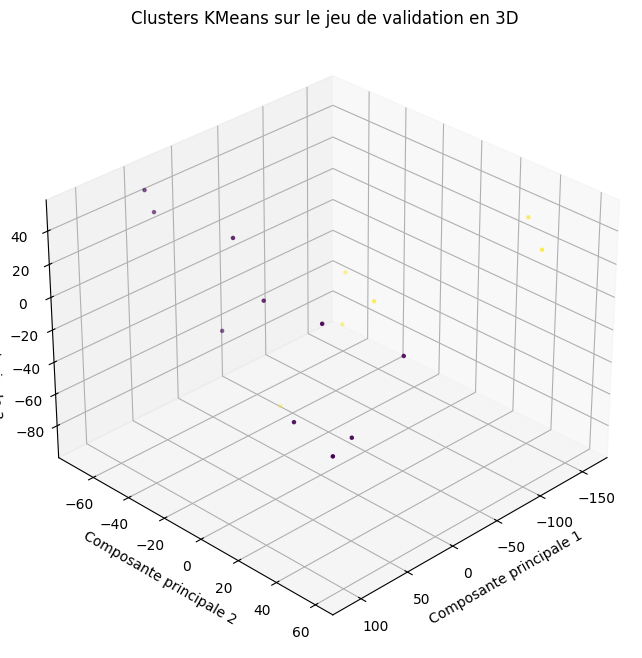

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def plot_clusters_v3(X, clusters, title):
    pca_3d = PCA(n_components=3)
    X_3d = pca_3d.fit_transform(X)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=clusters, cmap='viridis', marker='.')
    ax.set_title(title)
    ax.set_xlabel('Composante principale 1')
    ax.set_ylabel('Composante principale 2')
    ax.set_zlabel('Composante principale 3')
    ax.view_init(30, 45)
    plt.show()

# Visualisation des clusters sur les données de validation en 3D
plot_clusters_v3(X_val_pca, val_clusters, 'Clusters KMeans sur le jeu de validation en 3D')


Comparaison avec les labels réels et évaluation

In [10]:
# Comparaison avec les labels réels
predicted_labels = np.where(test_clusters == 1, 1, 0)

# Évaluation
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy: {accuracy}')

#save the model
import joblib

if not os.path.exists('models'):
    os.makedirs('models')
    
joblib.dump(kmeans, 'models/kmeans_model.pkl')

Accuracy: 0.5448717948717948


['models/kmeans_model.pkl']

Ce notebook contient toutes les étapes nécessaires pour appliquer le clustering avec Scikit-learn : https://scikit-learn.org/stable/modules/clustering.html, depuis l'installation des bibliothèques jusqu'à l'évaluation des résultats. 